# <font color='brown'>Face Mask Detection Model - InceptionV3</font>

### Importing the Necessary Packages

In [3]:
from imutils import paths #To import path of the images in dataset
import matplotlib.pyplot as plt # To use plots for visualisation
import numpy as np # Array handling library
import os # For file handling

from tensorflow.keras.preprocessing.image import ImageDataGenerator # For Data Augmentation
from tensorflow.keras.applications.inception_v3 import InceptionV3 # Deep Neural network model trained on Imagenet Dataset of Google

from tensorflow.keras.layers import AveragePooling2D # To Construct Pooling Layer
from tensorflow.keras.layers import Dropout # To Dropout the inputs for tackling overfitting 
from tensorflow.keras.layers import Flatten # Flatten the multidimension to single dimension
from tensorflow.keras.layers import Dense # Output layer - Fully connected
from tensorflow.keras.layers import Input # To create an Input layer without using Input Layer
from tensorflow.keras.models import Model # To group layers into an object 

from tensorflow.keras.optimizers import Adam # Optimizer for Training the Model

# Image Pre-Processing for Training the model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

# One-Hot encoding of the labels
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split # To Split the Dataset into Train & Test
from sklearn.metrics import classification_report # To Print a Classification Report
from sklearn.metrics import confusion_matrix # To Print a Confusion matrix
import seaborn as sns # To plot a Confusion Matrix

### Creating an Object for Images and Label

In [4]:
image_paths = list(paths.list_images('/Users/vinith/Desktop/Dissertation/dataset')) # Getting the image paths
data = [] # list object to store images
labels = [] # list object to store labels  

### Looping over the image dataset to append them on respective lists

In [5]:
for image_path in image_paths: # looping over the image_paths 
    lab = image_path.split(os.path.sep)[-2] # extracting the class label from the filename
    
    # load the input_image with target resolution (224x224) and preprocess it
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)

    # update the data and labels lists, respectively
    data.append(img)
    labels.append(lab)

/Users/vinith/tensorflow-test/env/lib/python3.8/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


### Convert the data and labels to NumPy arrays

In [6]:
data = np.array(data, dtype="float32") # converting imagedata into array  
labels = np.array(labels) # converting label data into array 

In [7]:
data.shape

(4092, 224, 224, 3)

In [8]:
labels.shape

(4092,)

### One-Hot Encoding of Categorical Variable

In [9]:
# One-Hot encoding using LabelBinarizer() technique
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

### Train & Test Split

In [10]:
# Splitting the training and testing data in the ratio of 80/20.
(X_train, X_test, y_train, y_test) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=45)

In [11]:
X_train.shape

(3273, 224, 224, 3)

In [12]:
X_test.shape

(819, 224, 224, 3)

### Data Augmentation

In [13]:
# constructing the training image_generator for image transformation
augment = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,
                         shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

### Loading a Pre_trained Model MobilenetV2

In [14]:
# loading the MobileNetV2 pretrained model with weights of imagent dataset
# Also remove the last fully connected layer
bm = InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
bm.summary()

Metal device set to: Apple M1


2022-12-09 12:04:07.561366: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-09 12:04:07.561665: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [15]:
# constructing the Output fully connected layer with output of 2 category
hm = bm.output
hm = AveragePooling2D(pool_size=(5, 5))(hm) # a layer with average pooling size of (7,7)
hm = Flatten(name="flatten")(hm) # Flatten the layer into single dimension
hm = Dense(128, activation="relu")(hm) # Output layer of 128
hm = Dropout(0.5)(hm) # Dropout 50% of the neurons
hm = Dense(2, activation="softmax")(hm) # Fianl Output Layer with 2 Categories

In [16]:
# Now place the created layers of output on the base model 
# to construct a model that produces output with 2 categories
main_model = Model(inputs=bm.input, outputs=hm)
main_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [17]:
# Freezing all the layers in the base model bm
for layer in bm.layers:
    layer.trainable = False

### Initialising the learning rate, Number of Epoch for training & Batch Size

In [18]:
lrate = 1e-4 # 0.0001 while calculating gradients 
epoch = 10 # No. of Epoch
bs = 32

### Model Compilation

In [19]:
opt = Adam(lr=lrate, decay=lrate / epoch)
main_model.compile(loss="binary_crossentropy", optimizer=opt,
metrics=["accuracy"])

/Users/vinith/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Model Training

In [20]:
History = main_model.fit(augment.flow(X_train, y_train, batch_size=bs),
steps_per_epoch=len(X_train) // bs,
validation_data=(X_test, y_test),
validation_steps=len(X_test) // bs,
epochs=epoch)

Epoch 1/10


2022-12-09 12:04:09.985875: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-09 12:04:11.506682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


102/102 [==============================] - ETA: 0s - loss: 0.2795 - accuracy: 0.8948

2022-12-09 12:04:36.850150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


102/102 [==============================] - 33s 301ms/step - loss: 0.2795 - accuracy: 0.8948 - val_loss: 0.0837 - val_accuracy: 0.9829
Epoch 2/10
102/102 [==============================] - 29s 278ms/step - loss: 0.0984 - accuracy: 0.9728 - val_loss: 0.0510 - val_accuracy: 0.9878
Epoch 3/10
102/102 [==============================] - 27s 265ms/step - loss: 0.0725 - accuracy: 0.9790 - val_loss: 0.0393 - val_accuracy: 0.9915
Epoch 4/10
102/102 [==============================] - 29s 280ms/step - loss: 0.0614 - accuracy: 0.9824 - val_loss: 0.0314 - val_accuracy: 0.9915
Epoch 5/10
102/102 [==============================] - 32s 315ms/step - loss: 0.0525 - accuracy: 0.9855 - val_loss: 0.0257 - val_accuracy: 0.9951
Epoch 6/10
102/102 [==============================] - 31s 306ms/step - loss: 0.0473 - accuracy: 0.9855 - val_loss: 0.0235 - val_accuracy: 0.9976
Epoch 7/10
102/102 [==============================] - 34s 329ms/step - loss: 0.0377 - accuracy: 0.9898 - val_loss: 0.0217 - val_accuracy: 0.9

### Making Prediction

In [21]:
# making predictions over the testing set
pred_idx = main_model.predict(X_test, batch_size=bs) # using the trained model to predict the labels of testing set

2022-12-09 12:09:30.633720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [22]:
pred_idx = np.argmax(pred_idx, axis=1) # using argmax function to predict probability of predicted labels

### Classification Report

In [23]:
# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), pred_idx,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00       433
without_mask       1.00      1.00      1.00       386

    accuracy                           1.00       819
   macro avg       1.00      1.00      1.00       819
weighted avg       1.00      1.00      1.00       819



### Confusion Matrix

In [24]:
cm = confusion_matrix((y_test.argmax(axis=1)), pred_idx, labels=[0,1])
cm

array([[432,   1],
       [  1, 385]])

<AxesSubplot:>

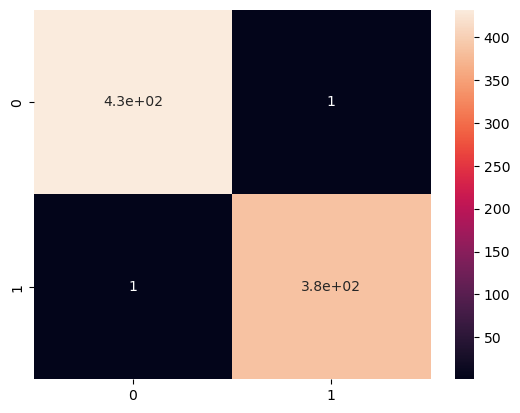

In [25]:
sns.heatmap(cm, annot=True)

### Plotting Accuracy and Loss Curves

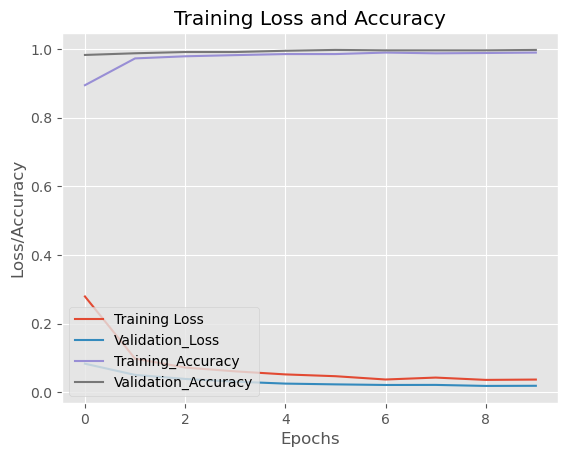

In [26]:
# plot the training loss and accuracy
n = epoch
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n), History.history["loss"], label="Training Loss")
plt.plot(np.arange(0, n), History.history["val_loss"], label="Validation_Loss")
plt.plot(np.arange(0, n), History.history["accuracy"], label="Training_Accuracy")
plt.plot(np.arange(0, n), History.history["val_accuracy"], label="Validation_Accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

### Reference
    FaceMaskDetection - Chandrikadeb7 - Github 